In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import requests

from ltc import LTCCell

In [2]:
url = 'http://api.scraperlink.com/investpy/?email=your@email.com&type=historical_data&product=cryptos&symbol=BTC&from_date=10/01/2013&to_date=10/30/2022'
response = requests.request('GET', url)
prices = response.json()['data']
data = pd.DataFrame(prices)

In [3]:
data.head()

,direction_color,rowDate,rowDateRaw,rowDateTimestamp,last_close,last_open,last_max,last_min,volume,volumeRaw,change_precent,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw,change_precentRaw
0,redFont,"Oct 30, 2022",1667088000,2022-10-30T00:00:00Z,"20,626.3","20,809.4","20,922.3","20,522.5",207.63K,207628,-0.88,20626.31250000000000,20809.38867187500000,20922.32031250000000,20522.49414062500000,-0.881842
1,greenFont,"Oct 29, 2022",1667001600,2022-10-29T00:00:00Z,"20,809.8","20,594.2","21,038.1","20,561.9",276.54K,276542,1.05,20809.82226562500000,20594.15820312500000,21038.09179687500000,20561.91015625000000,1.046252
2,greenFont,"Oct 28, 2022",1666915200,2022-10-28T00:00:00Z,"20,594.4","20,293.0","20,744.0","20,058.2",318.90K,318902,1.49,20594.35351562500000,20292.96484375000000,20743.99218750000000,20058.22265625000000,1.485588
3,redFont,"Oct 27, 2022",1666828800,2022-10-27T00:00:00Z,"20,292.9","20,769.5","20,867.9","20,231.6",365.49K,365494,-2.29,20292.88476562500000,20769.47070312500000,20867.89453125000000,20231.57031250000000,-2.294950
4,greenFont,"Oct 26, 2022",1666742400,2022-10-26T00:00:00Z,"20,769.5","20,086.8","20,981.5","20,062.9",427.99K,427991,3.42,20769.53515625000000,20086.81054687500000,20981.51562500000000,20062.91796875000000,3.420209


In [4]:
# Remove unnecessary columns
data.drop(columns=[
  'direction_color',
  'rowDateRaw',
  'rowDateTimestamp',

  # Quantity of btc bought or sold
  'volume',
  'volumeRaw',
  'change_precent',
  'change_precentRaw',
  'last_close',
  'last_open',
  'last_max',
  'last_min'
  ],
  inplace=True
)

data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,"Oct 30, 2022",20626.31250000000000,20809.38867187500000,20922.32031250000000,20522.49414062500000
1,"Oct 29, 2022",20809.82226562500000,20594.15820312500000,21038.09179687500000,20561.91015625000000
2,"Oct 28, 2022",20594.35351562500000,20292.96484375000000,20743.99218750000000,20058.22265625000000
3,"Oct 27, 2022",20292.88476562500000,20769.47070312500000,20867.89453125000000,20231.57031250000000
4,"Oct 26, 2022",20769.53515625000000,20086.81054687500000,20981.51562500000000,20062.91796875000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rowDate        3317 non-null   object
 1   last_closeRaw  3317 non-null   object
 2   last_openRaw   3317 non-null   object
 3   last_maxRaw    3317 non-null   object
 4   last_minRaw    3317 non-null   object
dtypes: object(5)
memory usage: 129.7+ KB


In [6]:
data.isnull().sum()

rowDate          0
last_closeRaw    0
last_openRaw     0
last_maxRaw      0
last_minRaw      0
dtype: int64

In [7]:
# Convert date object to datetime
data['rowDate'] = pd.to_datetime(data['rowDate'])

# Convert values to floats
data = data.astype({
    'last_closeRaw': 'float',
    'last_openRaw': 'float',
    'last_maxRaw': 'float',
    'last_minRaw': 'float'
})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rowDate        3317 non-null   datetime64[ns]
 1   last_closeRaw  3317 non-null   float64       
 2   last_openRaw   3317 non-null   float64       
 3   last_maxRaw    3317 non-null   float64       
 4   last_minRaw    3317 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 129.7 KB


In [9]:
data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,2022-10-30,20626.312500,20809.388672,20922.320312,20522.494141
1,2022-10-29,20809.822266,20594.158203,21038.091797,20561.910156
2,2022-10-28,20594.353516,20292.964844,20743.992188,20058.222656
3,2022-10-27,20292.884766,20769.470703,20867.894531,20231.570312
4,2022-10-26,20769.535156,20086.810547,20981.515625,20062.917969


In [10]:
data.rename(
    columns={
        'last_closeRaw': 'close',
        'last_openRaw': 'open',
        'last_maxRaw': 'high',
        'last_minRaw': 'low',
        'rowDate': 'Date'
    },
    inplace=True
)

In [11]:
data.head()

,Date,close,open,high,low
0,2022-10-30,20626.312500,20809.388672,20922.320312,20522.494141
1,2022-10-29,20809.822266,20594.158203,21038.091797,20561.910156
2,2022-10-28,20594.353516,20292.964844,20743.992188,20058.222656
3,2022-10-27,20292.884766,20769.470703,20867.894531,20231.570312
4,2022-10-26,20769.535156,20086.810547,20981.515625,20062.917969


In [12]:
data.set_index('Date', inplace=True)

In [13]:
btc_prices = pd.DataFrame(data['close']).rename(columns={ 'close': 'Price' })

In [14]:
btc_prices.head()

,Price
Date,
2022-10-30,20626.312500
2022-10-29,20809.822266
2022-10-28,20594.353516
2022-10-27,20292.884766
2022-10-26,20769.535156


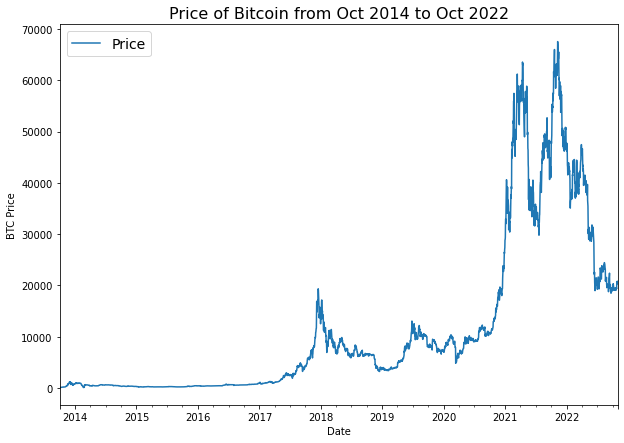

In [15]:
# Visualize closing prices
import matplotlib.pyplot as plt

btc_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from Oct 2014 to Oct 2022', fontsize=16)
plt.legend(fontsize=14);

In [16]:
# Sort ascending order of prices
btc_prices.sort_values('Date', inplace=True)
btc_prices.head()

,Price
Date,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,130.990005
2013-10-04,136.820007
2013-10-05,136.699997


In [17]:
timesteps = btc_prices.index.to_numpy()
prices = btc_prices['Price'].to_numpy()

In [18]:
timesteps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2022-10-28T00:00:00.000000000', '2022-10-29T00:00:00.000000000',
        '2022-10-30T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  140.30000305,   123.        ,   130.99000549, ...,
        20594.35351562, 20809.82226562, 20626.3125    ]))

In [19]:
# Create sequential splits at a specified point (80% train, 20% test)
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2653,), (664,), (2653,), (664,))

In [20]:
# Create a helper plotting function
def plot_time_series(timesteps, prices, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], prices[start:end], format, label=label)
    plt.xlabel('Date')
    plt.ylabel('Price')
    if label:
        plt.legend(fontsize=14)

    # Display a grid for easier measurement readings
    plt.grid(True)

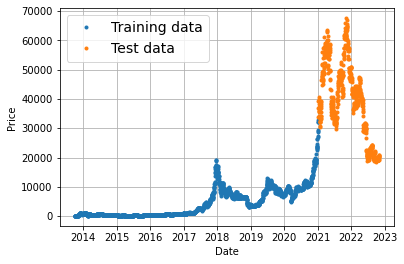

In [21]:
plot_time_series(X_train, y_train, label='Training data')
plot_time_series(X_test, y_test, label='Test data')

### Create windowed train & test sets

In [22]:
# predict 1 step at a time
HORIZON = 1

# use a week worth of timesteps to predict the horizon
WINDOW_SIZE = 7

In [23]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [24]:
# Create a function to make windows across entire time series
def make_windows(x, window_size=7, horizon=1):
    # Create a window of specific window_size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    
    # Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    
    windowed_array = x[window_indexes]
    
    windows, labels = get_labelled_windows(windowed_array, horizon)
    return windows, labels

In [25]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

In [26]:
full_windows, full_labels

(array([[  140.30000305,   123.        ,   130.99000549, ...,
           136.69999695,   137.80000305,   135.80000305],
        [  123.        ,   130.99000549,   136.82000732, ...,
           137.80000305,   135.80000305,   136.49000549],
        [  130.99000549,   136.82000732,   136.69999695, ...,
           135.80000305,   136.49000549,   139.5       ],
        ...,
        [19162.60351562, 19204.79882812, 19571.24609375, ...,
         20082.66601562, 20769.53515625, 20292.88476562],
        [19204.79882812, 19571.24609375, 19331.50195312, ...,
         20769.53515625, 20292.88476562, 20594.35351562],
        [19571.24609375, 19331.50195312, 20082.66601562, ...,
         20292.88476562, 20594.35351562, 20809.82226562]]),
 array([[  136.49000549],
        [  139.5       ],
        [  140.41000366],
        ...,
        [20594.35351562],
        [20809.82226562],
        [20626.3125    ]]))

In [27]:
def make_train_test_splits(windows, labels, test_split=.2):
    split_size = int(len(windows) * (1 - test_split)) # 80%
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [28]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2648, 662, 2648, 662)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    
    # Expand dimensions to align with required input shape
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTCCell(32), time_major=True),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 rnn (RNN)                   (1, 32)                   5040      
                                                                 
 dense (Dense)               (1, 1)                    33        
                                                                 
Total params: 5,073
Trainable params: 5,073
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

history_1 = model.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 11s 55ms/step - loss: nan - mae: nan - mse: nan
Epoch 2/10
83/83 [==============================] - 5s 55ms/step - loss: nan - mae: nan - mse: nan
Epoch 3/10
83/83 [==============================] - 4s 53ms/step - loss: nan - mae: nan - mse: nan
Epoch 4/10
83/83 [==============================] - 5s 55ms/step - loss: nan - mae: nan - mse: nan
Epoch 5/10
83/83 [==============================] - 4s 52ms/step - loss: nan - mae: nan - mse: nan
Epoch 6/10
83/83 [==============================] - 5s 54ms/step - loss: nan - mae: nan - mse: nan
Epoch 7/10
83/83 [==============================] - 5s 56ms/step - loss: nan - mae: nan - mse: nan
Epoch 8/10
83/83 [==============================] - 5s 57ms/step - loss: nan - mae: nan - mse: nan
Epoch 9/10
83/83 [==============================] - 5s 54ms/step - loss: nan - mae: nan - mse: nan
Epoch 10/10
83/83 [==============================] - 5s 56ms/step - loss: nan - mae: nan - mse: nan


Gradient explosion occurs on less number of epochs

In [38]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTCCell(32), time_major=True, return_sequences=True),
    
    # Add LSTM to handle gradient explosion
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [39]:
model_2.compile(
    optimizer = tf.keras.optimizers.Adam(
        learning_rate = .01,
        clipnorm = 1
    ),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [40]:
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
83/83 [==============================] - 17s 64ms/step - loss: 4408.7490 - mae: 4408.7490 - mse: 43579188.0000
Epoch 2/10
83/83 [==============================] - 5s 61ms/step - loss: 4386.4106 - mae: 4386.4106 - mse: 43382904.0000
Epoch 3/10
83/83 [==============================] - 5s 60ms/step - loss: 4365.0845 - mae: 4365.0845 - mse: 43197352.0000
Epoch 4/10
83/83 [==============================] - 5s 64ms/step - loss: 4343.8691 - mae: 4343.8691 - mse: 43011292.0000
Epoch 5/10
83/83 [==============================] - 5s 60ms/step - loss: 4322.7026 - mae: 4322.7026 - mse: 42828548.0000
Epoch 6/10
83/83 [==============================] - 5s 66ms/step - loss: 4301.5674 - mae: 4301.5674 - mse: 42646140.0000
Epoch 7/10
83/83 [==============================] - 5s 59ms/step - loss: 4280.5024 - mae: 4280.5024 - mse: 42466120.0000
Epoch 8/10
83/83 [==============================] - 5s 56ms/step - loss: 4259.5601 - mae: 4259.5601 - mse: 42284752.0000
Epoch 9/10
83/83 [=============

In [43]:
def plot_loss_curves(history):
    loss = history.history['loss']
    mae = history.history['mae']
    mse = history.history['mse']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, mae, label='MAE')
    plt.plot(epochs, mse, label='MSE')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

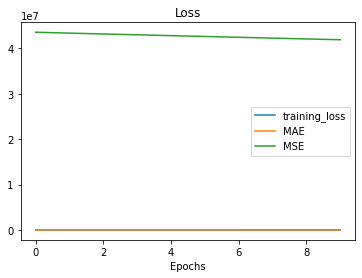

In [44]:
plot_loss_curves(history_2)